In [3]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

# Import key
from key import postgreskey

In [2]:
# read in csv files into df
csv_file = "Resources/2019.csv"
year_2019 = pd.read_csv(csv_file)

csv_file = "Resources/2018.csv"
year_2018 = pd.read_csv(csv_file)

csv_file = "Resources/2017.csv"
year_2017 = pd.read_csv(csv_file)

csv_file = "Resources/2016.csv"
year_2016 = pd.read_csv(csv_file)

csv_file = "Resources/2015.csv"
year_2015 = pd.read_csv(csv_file)

## --------------------------------------------------------------------------------
## Clean and combine happiness years dfs

In [3]:
#add column 'years' to each df
year_col = '2019'
year_2019['year'] = year_col

year_col2 = '2018'
year_2018['year'] = year_col2

year_col3 = '2017'
year_2017['year'] = year_col3

year_col4 = '2016'
year_2016['year'] = year_col4

year_col5 = '2015'
year_2015['year'] = year_col5

In [4]:
year_2019_df = year_2019.rename(columns={'GDP per capita': 'GDP_per_capita','Country or region': 'Country', 'Healthy life expectancy': 'Life_expectancy', 'Freedom to make life choices': 'Freedom', 'Social support': 'Social_support'})
year_2019_df

,Overall rank,Country,Score,GDP_per_capita,Social_support,Life_expectancy,Freedom,Generosity,Perceptions of corruption,year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,2019
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,2019
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,2019
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,2019


In [5]:
year_2019_df2 = year_2019_df.drop(columns=['Overall rank', 'Generosity', 'Perceptions of corruption'])
year_2019_df2

,Country,Score,GDP_per_capita,Social_support,Life_expectancy,Freedom,year
0,Finland,7.769,1.340,1.587,0.986,0.596,2019
1,Denmark,7.600,1.383,1.573,0.996,0.592,2019
2,Norway,7.554,1.488,1.582,1.028,0.603,2019
3,Iceland,7.494,1.380,1.624,1.026,0.591,2019
4,Netherlands,7.488,1.396,1.522,0.999,0.557,2019
...,...,...,...,...,...,...,...
151,Rwanda,3.334,0.359,0.711,0.614,0.555,2019
152,Tanzania,3.231,0.476,0.885,0.499,0.417,2019
153,Afghanistan,3.203,0.350,0.517,0.361,0.000,2019
154,Central African Republic,3.083,0.026,0.000,0.105,0.225,2019


In [6]:
year_2018_df = year_2018.rename(columns={'GDP per capita': 'GDP_per_capita', 'Country or region': 'Country', 'Healthy life expectancy': 'Life_expectancy', 'Freedom to make life choices': 'Freedom', 'Social support': 'Social_support'})
year_2018_df

,Overall rank,Country,Score,GDP_per_capita,Social_support,Life_expectancy,Freedom,Generosity,Perceptions of corruption,year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018
...,...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064,2018
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097,2018
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106,2018
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038,2018


In [7]:
year_2018_df2 = year_2018_df.drop(columns=['Overall rank', 'Generosity', 'Perceptions of corruption', 'Generosity'])
year_2018_df2

,Country,Score,GDP_per_capita,Social_support,Life_expectancy,Freedom,year
0,Finland,7.632,1.305,1.592,0.874,0.681,2018
1,Norway,7.594,1.456,1.582,0.861,0.686,2018
2,Denmark,7.555,1.351,1.590,0.868,0.683,2018
3,Iceland,7.495,1.343,1.644,0.914,0.677,2018
4,Switzerland,7.487,1.420,1.549,0.927,0.660,2018
...,...,...,...,...,...,...,...
151,Yemen,3.355,0.442,1.073,0.343,0.244,2018
152,Tanzania,3.303,0.455,0.991,0.381,0.481,2018
153,South Sudan,3.254,0.337,0.608,0.177,0.112,2018
154,Central African Republic,3.083,0.024,0.000,0.010,0.305,2018


In [8]:
year_2017_df = year_2017.rename(columns={'Happiness.Score': 'Score', 'Economy..GDP.per.Capita.': 'GDP_per_capita','Health..Life.Expectancy.': 'Life_expectancy', 'Family': 'Social_support'})
year_2017_df

,Country,Happiness.Rank,Score,Whisker.high,Whisker.low,GDP_per_capita,Social_support,Life_expectancy,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,2017
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,2017
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,2017
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,2017


In [9]:
year_2017_df2 = year_2017_df.drop(columns=['Happiness.Rank', 'Whisker.high', 'Whisker.low', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual'])
year_2017_df2

,Country,Score,GDP_per_capita,Social_support,Life_expectancy,Freedom,year
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,2017
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,2017
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,2017
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,2017
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,2017
...,...,...,...,...,...,...,...
150,Rwanda,3.471,0.368746,0.945707,0.326425,0.581844,2017
151,Syria,3.462,0.777153,0.396103,0.500533,0.081539,2017
152,Tanzania,3.349,0.511136,1.041990,0.364509,0.390018,2017
153,Burundi,2.905,0.091623,0.629794,0.151611,0.059901,2017


In [10]:
year_2016_df = year_2016.rename(columns={'Happiness Score': 'Score', 'Economy (GDP per Capita)': 'GDP_per_capita','Health (Life Expectancy)': 'Life_expectancy', 'Family': 'Social_support'})
year_2016_df

,Country,Region,Happiness Rank,Score,Lower Confidence Interval,Upper Confidence Interval,GDP_per_capita,Social_support,Life_expectancy,Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,2016
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,2016
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,2016
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,2016


In [11]:
year_2016_df2 = year_2016_df.drop(columns=['Region', 'Happiness Rank', 'Trust (Government Corruption)', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Generosity', 'Dystopia Residual'])
year_2016_df2

,Country,Score,GDP_per_capita,Social_support,Life_expectancy,Freedom,year
0,Denmark,7.526,1.44178,1.16374,0.79504,0.57941,2016
1,Switzerland,7.509,1.52733,1.14524,0.86303,0.58557,2016
2,Iceland,7.501,1.42666,1.18326,0.86733,0.56624,2016
3,Norway,7.498,1.57744,1.12690,0.79579,0.59609,2016
4,Finland,7.413,1.40598,1.13464,0.81091,0.57104,2016
...,...,...,...,...,...,...,...
152,Benin,3.484,0.39499,0.10419,0.21028,0.39747,2016
153,Afghanistan,3.360,0.38227,0.11037,0.17344,0.16430,2016
154,Togo,3.303,0.28123,0.00000,0.24811,0.34678,2016
155,Syria,3.069,0.74719,0.14866,0.62994,0.06912,2016


In [12]:
year_2015_df = year_2015.rename(columns={'Happiness Score': 'Score', 'Economy (GDP per Capita)': 'GDP_per_capita','Health (Life Expectancy)': 'Life_expectancy', 'Family': 'Social_support'})
year_2015_df

,Country,Region,Happiness Rank,Score,Standard Error,GDP_per_capita,Social_support,Life_expectancy,Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,2015
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,2015
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,2015
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2015


In [13]:
year_2015_df2 = year_2015_df.drop(columns=['Region', 'Happiness Rank', 'Standard Error', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'])
year_2015_df2

,Country,Score,GDP_per_capita,Social_support,Life_expectancy,Freedom,year
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,2015
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,2015
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,2015
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,2015
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,2015
...,...,...,...,...,...,...,...
153,Rwanda,3.465,0.22208,0.77370,0.42864,0.59201,2015
154,Benin,3.340,0.28665,0.35386,0.31910,0.48450,2015
155,Syria,3.006,0.66320,0.47489,0.72193,0.15684,2015
156,Burundi,2.905,0.01530,0.41587,0.22396,0.11850,2015


## Final happiness_df (all 5 years)

In [14]:
#happiness_df = pd.concat([year_2019_df2, year_2018_df2, year_2017_df2, year_2016_df2, year_2015_df2], sort=True)
happiness_df = pd.concat([year_2019_df2], sort=True)
happiness_df

,Country,Freedom,GDP_per_capita,Life_expectancy,Score,Social_support,year
0,Finland,0.596,1.340,0.986,7.769,1.587,2019
1,Denmark,0.592,1.383,0.996,7.600,1.573,2019
2,Norway,0.603,1.488,1.028,7.554,1.582,2019
3,Iceland,0.591,1.380,1.026,7.494,1.624,2019
4,Netherlands,0.557,1.396,0.999,7.488,1.522,2019
...,...,...,...,...,...,...,...
151,Rwanda,0.555,0.359,0.614,3.334,0.711,2019
152,Tanzania,0.417,0.476,0.499,3.231,0.885,2019
153,Afghanistan,0.000,0.350,0.361,3.203,0.517,2019
154,Central African Republic,0.225,0.026,0.105,3.083,0.000,2019


In [15]:
happiness_df.isnull().sum()

Country            0
Freedom            0
GDP_per_capita     0
Life_expectancy    0
Score              0
Social_support     0
year               0
dtype: int64

In [16]:
Country_list = happiness_df["Country"].tolist()
Country_list

['Finland',
 'Denmark',
 'Norway',
 'Iceland',
 'Netherlands',
 'Switzerland',
 'Sweden',
 'New Zealand',
 'Canada',
 'Austria',
 'Australia',
 'Costa Rica',
 'Israel',
 'Luxembourg',
 'United Kingdom',
 'Ireland',
 'Germany',
 'Belgium',
 'United States',
 'Czech Republic',
 'United Arab Emirates',
 'Malta',
 'Mexico',
 'France',
 'Taiwan',
 'Chile',
 'Guatemala',
 'Saudi Arabia',
 'Qatar',
 'Spain',
 'Panama',
 'Brazil',
 'Uruguay',
 'Singapore',
 'El Salvador',
 'Italy',
 'Bahrain',
 'Slovakia',
 'Trinidad & Tobago',
 'Poland',
 'Uzbekistan',
 'Lithuania',
 'Colombia',
 'Slovenia',
 'Nicaragua',
 'Kosovo',
 'Argentina',
 'Romania',
 'Cyprus',
 'Ecuador',
 'Kuwait',
 'Thailand',
 'Latvia',
 'South Korea',
 'Estonia',
 'Jamaica',
 'Mauritius',
 'Japan',
 'Honduras',
 'Kazakhstan',
 'Bolivia',
 'Hungary',
 'Paraguay',
 'Northern Cyprus',
 'Peru',
 'Portugal',
 'Pakistan',
 'Russia',
 'Philippines',
 'Serbia',
 'Moldova',
 'Libya',
 'Montenegro',
 'Tajikistan',
 'Croatia',
 'Hong Kong',

## --------------------------------------------------------------------------------
## Final: pop_growth_df (population growth)

In [17]:
# read in csv files into df
csv_pop_growth = "Resources/Population_growth.csv"
csv_pop_growth_file = pd.read_csv(csv_pop_growth)

csv_suic_rate = "Resources/Suicide_rate.csv"
csv_suic_rate_file = pd.read_csv(csv_suic_rate)

In [18]:
pop_growth_df = csv_pop_growth_file.drop(columns=['ISO-code'])
pop_growth_df = pop_growth_df.rename(columns={'Population growth':'Population_growth'})

pop_growth_df = pop_growth_df[pop_growth_df['Country'].isin(Country_list)]
pop_growth_df



,Country,Population_growth
0,Afghanistan,2.41
1,Albania,0.26
2,Algeria,1.89
7,Argentina,0.88
8,Armenia,0.17
...,...,...
202,Venezuela,1.53
203,Vietnam,1.06
204,Yemen,2.33
205,Zambia,3.19


In [19]:
pop_growth_df.isnull().sum()

Country              0
Population_growth    0
dtype: int64

## --------------------------------------------------------------------------------
## Final: suic_rate_df (suicide rate)

In [20]:
suic_rate_df = csv_suic_rate_file.drop(columns=['ISO-code'])
suic_rate_df = suic_rate_df.rename(columns={'Suicide rate':'Suicide_rate'})


suic_rate_df = suic_rate_df[suic_rate_df['Country'].isin(Country_list)]
suic_rate_df

,Country,Suicide_rate
0,Afghanistan,6.4
1,Albania,5.6
2,Algeria,3.3
5,Argentina,9.1
6,Armenia,5.7
...,...,...
177,Venezuela,3.8
178,Vietnam,7.0
179,Yemen,9.8
180,Zambia,11.3


In [21]:
suic_rate_df.isnull().sum()

Country         0
Suicide_rate    0
dtype: int64

## --------------------------------------------------------------------------------
## read in csv file: India_GDP_1960-2022

In [22]:
csv_india_gdp = "Resources/India_GDP_1960-2022.csv"
csv_india_gdp_file = pd.read_csv(csv_india_gdp, skiprows=[0])
csv_india_gdp_file

,Unnamed: 0,Year,GDP in (Billion) $,Per Capita in rupees,Growth %
0,0,2021,3173.40,182160,8.95
1,1,2020,2667.69,154640,-6.60
2,2,2019,2831.55,165760,3.74
3,3,2018,2702.93,159840,6.45
4,4,2017,2651.47,158480,6.80
...,...,...,...,...,...
57,57,1964,56.48,9280,7.45
58,58,1963,48.42,8080,5.99
59,59,1962,42.16,7200,2.93
60,60,1961,39.23,6800,3.72


## Final:  india_gdp_df

In [23]:
india_gdp_df = csv_india_gdp_file.drop(columns=['Unnamed: 0'])
india_gdp_df = india_gdp_df.rename(columns={'GDP in (Billion) $':'GDP_Billion','Per Capita in rupees':'Per_Capita-rupees','Growth %':'Growth'})
india_gdp_df["Country"]="India"
india_gdp_df

,Year,GDP_Billion,Per_Capita-rupees,Growth,Country
0,2021,3173.40,182160,8.95,India
1,2020,2667.69,154640,-6.60,India
2,2019,2831.55,165760,3.74,India
3,2018,2702.93,159840,6.45,India
4,2017,2651.47,158480,6.80,India
...,...,...,...,...,...
57,1964,56.48,9280,7.45,India
58,1963,48.42,8080,5.99,India
59,1962,42.16,7200,2.93,India
60,1961,39.23,6800,3.72,India


In [24]:
india_gdp_df.isnull().sum()

Year                 0
GDP_Billion          0
Per_Capita-rupees    0
Growth               0
Country              0
dtype: int64

## --------------------------------------------------------------------------------

In [5]:
#connect to local db

protocol = 'postgresql'
username = 'postgres'
password = postgreskey
host = 'localhost'
port = 5432
database_name = 'happiness_db'
rds_connection_string = f'{protocol}://{username}:{password}@{host}:{port}/{database_name}'
engine = create_engine(rds_connection_string)

In [27]:
#confirm table names in SQL
engine.table_names()

/Users/pedrogomez/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  


['HAPPINESS', 'SUICIDE_RATE', 'POPULATION_GROWTH', 'INDIA_GDP']

In [28]:
#add the happiness df
happiness_df.to_sql(name='HAPPINESS', con=engine, if_exists='append', index=False)

In [29]:
#add the SUICIDE df
suic_rate_df.to_sql(name='SUICIDE_RATE', con=engine, if_exists='append', index=False)

In [30]:
#add the POPULATION df
pop_growth_df.to_sql(name='POPULATION_GROWTH', con=engine, if_exists='append', index=False)

In [31]:
#add the INDIA  df
india_gdp_df.to_sql(name='INDIA_GDP', con=engine, if_exists='append', index=False)

In [32]:
#confirm data is there HAPPINESS
pd.read_sql_query('select * from "HAPPINESS"', con=engine).head()

,year,Country,Score,GDP_per_capita,Social_support,Life_expectancy,Freedom
0,2019,Finland,7.769,1.340,1.587,0.986,0.596
1,2019,Denmark,7.600,1.383,1.573,0.996,0.592
2,2019,Norway,7.554,1.488,1.582,1.028,0.603
3,2019,Iceland,7.494,1.380,1.624,1.026,0.591
4,2019,Netherlands,7.488,1.396,1.522,0.999,0.557


In [33]:
#confirm data is there SUICIDE_RATE
pd.read_sql_query('select * from "SUICIDE_RATE"', con=engine).head()

,Country,Suicide_rate
0,Afghanistan,6.4
1,Albania,5.6
2,Algeria,3.3
3,Argentina,9.1
4,Armenia,5.7


In [34]:
#confirm data is there POPULATION_GROWTH
pd.read_sql_query('select * from "POPULATION_GROWTH"', con=engine).head()

,Country,Population_growth
0,Afghanistan,2.41
1,Albania,0.26
2,Algeria,1.89
3,Argentina,0.88
4,Armenia,0.17


In [35]:
#confirm data is there INDIA_GDP
pd.read_sql_query('select * from "INDIA_GDP"', con=engine).head()

,Country,Year,GDP_Billion,Per_Capita-rupees,Growth
0,India,2021,3173.40,182160.0,8.95
1,India,2020,2667.69,154640.0,-6.60
2,India,2019,2831.55,165760.0,3.74
3,India,2018,2702.93,159840.0,6.45
4,India,2017,2651.47,158480.0,6.80


In [6]:
Happiness_suic = pd.read_sql_query('SELECT "HAPPINESS"."Country","HAPPINESS"."Score","SUICIDE_RATE"."Suicide_rate" FROM "HAPPINESS" LEFT JOIN "SUICIDE_RATE" ON "SUICIDE_RATE"."Country" = "HAPPINESS"."Country" ORDER BY "Score" desc;', con=engine)
Happiness_suic = Happiness_suic.dropna()
Happiness_suic

,Country,Score,Suicide_rate
0,Finland,7.769,11.7
1,Denmark,7.600,9.2
2,Norway,7.554,10.1
3,Iceland,7.494,13.3
4,Netherlands,7.488,9.6
...,...,...,...
152,Rwanda,3.334,11.0
153,Tanzania,3.231,9.6
154,Afghanistan,3.203,6.4
155,Central African Republic,3.083,11.6


In [7]:
score = Happiness_suic["Score"]
s_rate = Happiness_suic["Suicide_rate"]

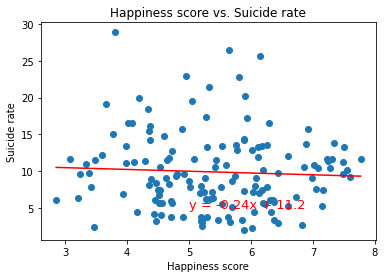

<Figure size 432x288 with 0 Axes>

In [8]:
# Calculate the correlation coefficient and linear regression model 


x_values = score
y_values = s_rate

#calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create graphic with linear regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,5),fontsize=13,color="red")
plt.title("Happiness score vs. Suicide rate")
plt.xlabel("Happiness score")
plt.ylabel("Suicide rate")

#print
plt.show()

plt.savefig("HappinessVsSuicide.png")

In [9]:
Happiness_pop = pd.read_sql_query('SELECT "HAPPINESS"."Country","HAPPINESS"."Score","POPULATION_GROWTH"."Population_growth" FROM "HAPPINESS" LEFT JOIN "POPULATION_GROWTH" ON "POPULATION_GROWTH"."Country" = "HAPPINESS"."Country" ORDER BY "Score" desc;', con=engine)
Happiness_pop = Happiness_pop.dropna()
Happiness_pop

,Country,Score,Population_growth
0,Finland,7.769,0.48
1,Denmark,7.600,0.36
2,Norway,7.554,1.32
3,Iceland,7.494,0.35
4,Netherlands,7.488,0.45
...,...,...,...
152,Rwanda,3.334,2.77
153,Tanzania,3.231,3.04
154,Afghanistan,3.203,2.41
155,Central African Republic,3.083,1.99


In [10]:
score2 = Happiness_pop["Score"]
s_pop = Happiness_pop["Population_growth"]

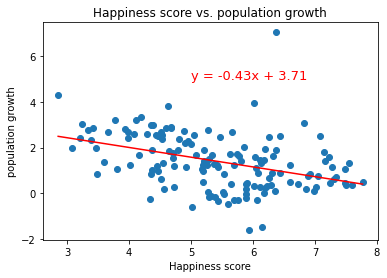

<Figure size 432x288 with 0 Axes>

In [11]:
# Calculate the correlation coefficient and linear regression model 


x_values2 = score2
y_values2 = s_pop

#calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values2, y_values2)
regress_values = x_values2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create graphic with linear regression
plt.scatter(x_values2,y_values2)
plt.plot(x_values2,regress_values,"r-")
plt.annotate(line_eq,(5,5),fontsize=13,color="red")
plt.title("Happiness score vs. population growth")
plt.xlabel("Happiness score")
plt.ylabel("population growth")

#print
plt.show()

plt.savefig("HappinessVsPopulation.png")

In [58]:
India = pd.read_sql_query('SELECT "HAPPINESS"."Country", "HAPPINESS"."Score", "POPULATION_GROWTH"."Population_growth", "SUICIDE_RATE"."Suicide_rate", "INDIA_GDP"."Per_Capita-rupees", "INDIA_GDP"."Year" FROM "HAPPINESS" LEFT JOIN "POPULATION_GROWTH" ON "HAPPINESS"."Country" = "POPULATION_GROWTH"."Country" LEFT JOIN "SUICIDE_RATE" ON "HAPPINESS"."Country" = "SUICIDE_RATE"."Country" LEFT JOIN "INDIA_GDP" ON "HAPPINESS"."Country" = "INDIA_GDP"."Country" ;', con=engine)
India = India.dropna()
India = India.loc[India['Year']==2019]
India

,Country,Score,Population_growth,Suicide_rate,Per_Capita-rupees,Year
116,India,4.015,1.26,16.5,165760.0,2019.0
